# Facial Recognition System

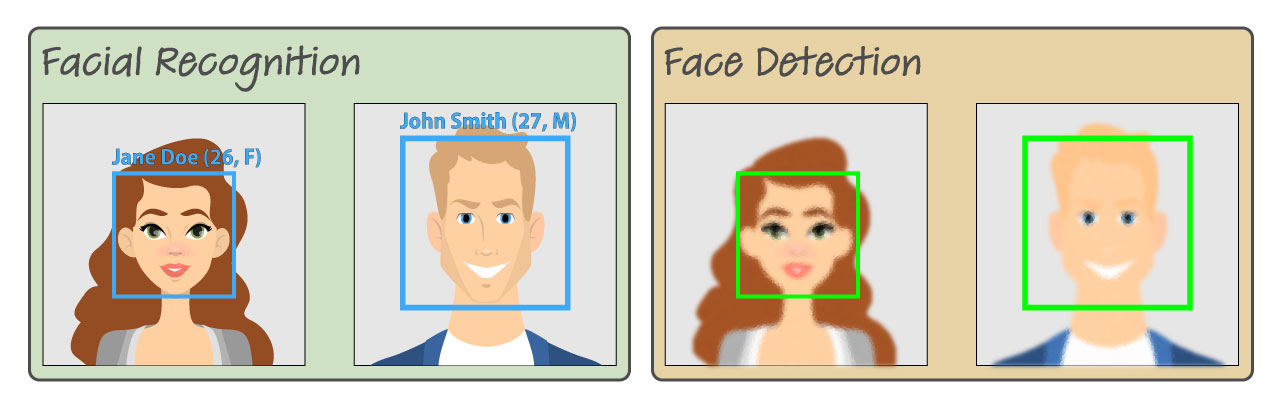

In [1]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import cv2
import os
from datetime import datetime

In [2]:
face_1 = face_recognition.load_image_file("Faces/elonmusk.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Faces/emmawatson.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("Faces/robertdownyjr.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("Faces/sundarpichai.jpg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

face_5 = face_recognition.load_image_file("Faces/Elizabeth Olsen.jpeg")
face_5_encoding = face_recognition.face_encodings(face_5)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding,
    face_5_encoding,
]
known_face_names = [
    "Elon Musk",
    "Emma Watson",
    "Robert Downy Jr.",
    "Sundar Pichai",
    "Elizabeth Olsen"
]

print("Done learning and creating profiles")

Done learning and creating profiles


## Initializing function to add names to the "attendance_list.csv" file

In [3]:
def makeAttendanceEntry(name):
    with open("Faces/attendance_list.csv", "r+") as FILE: #Opening file for reading and writing
        allLines = FILE.readlines() # All rows will be saved in All lines
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        #if name not in attendanceList:
        now = datetime.now()
        dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
        FILE.writelines(f'\n{name},{dtString}')

## Perform Face Recongnition and Entering Attendance with time-stamp

In [13]:
file_name = "Faces/Unknowns/unknown05.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    
    name = 'Unknown'
    
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    
    if matches[best_match_index]:
        name = known_face_names[best_match_index]
        
    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom), (0, 255, 0), 3)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    cv2.putText(unknown_image_to_draw, name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)
    
    

# display(pil_image)
cv2.namedWindow("Face Recognition", cv2.WINDOW_AUTOSIZE)

cv2.imshow(name, unknown_image_to_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()

Elizabeth Olsen


## Explore Attendance Sheet

In [11]:
import pandas as pd

sheet = pd.read_csv("Faces/attendance_list.csv", header=None)
sheet.columns = ['Names', 'Date', 'Time']
sheet.head()

,Names,Date,Time
0,Emma Watson,14/Feb/2023,11:22:24
1,Unknown,14/Feb/2023,11:25:05
2,Unknown,14/Feb/2023,11:28:34
3,Elon Musk,14/Feb/2023,11:29:41
4,Elizabeth Olsen,14/Feb/2023,11:39:00
